## Using Adaline sochastic gradient descent to predict whether a house will sell

This code is copied/adapted from Python Machine Learning, by Sebastian Raschka

https://github.com/rasbt/python-machine-learning-book-3rd-edition

The changes were made by Lee Spector for COSC-247 at Amherst College

In [1]:
import numpy as np

class AdalineSGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    shuffle : bool (default: True)
      Shuffles training data every epoch if True to prevent cycles.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Sum-of-squares cost function value averaged over all
      training examples in each epoch.

        
    """
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
        
    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self

    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """Initialize weights to small random numbers"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1 + m)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        """Apply Adaline learning rule to update the weights"""
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        #print(self.w_)
        #print("xi:", xi, "target:", target, "output:", output, "error:", error)
        return cost
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)


In [2]:
import pandas as pd

df = pd.read_csv('home-sales-data.csv').astype(float) ## note type cast
df

,Square Feet,Asking (x1000),Sold in First Week
0,2000.0,250.0,1.0
1,1234.0,400.0,-1.0
2,850.0,125.0,1.0
3,1000.0,175.0,1.0
4,1000.0,200.0,-1.0
5,1600.0,300.0,-1.0


In [3]:
a = df.to_numpy()
a

array([[ 2.000e+03,  2.500e+02,  1.000e+00],
       [ 1.234e+03,  4.000e+02, -1.000e+00],
       [ 8.500e+02,  1.250e+02,  1.000e+00],
       [ 1.000e+03,  1.750e+02,  1.000e+00],
       [ 1.000e+03,  2.000e+02, -1.000e+00],
       [ 1.600e+03,  3.000e+02, -1.000e+00]])

In [4]:
sold = a[a[:,2] == 1, :2]
sold

array([[2000.,  250.],
       [ 850.,  125.],
       [1000.,  175.]])

In [5]:
unsold = a[a[:,2] == -1, :2]
unsold

array([[1234.,  400.],
       [1000.,  200.],
       [1600.,  300.]])

In [6]:
X = a[:, :2]
X

array([[2000.,  250.],
       [1234.,  400.],
       [ 850.,  125.],
       [1000.,  175.],
       [1000.,  200.],
       [1600.,  300.]])

In [7]:
y = a[:, 2]
y

array([ 1., -1.,  1.,  1., -1., -1.])

In [8]:
%matplotlib inline
from matplotlib import pyplot as plt 
from matplotlib.colors import ListedColormap
#plt.rcdefaults() 

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

In [9]:
# standardize features
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()
X_std

array([[ 1.79402785,  0.09284767],
       [-0.11638735,  1.76410571],
       [-1.07408896, -1.29986737],
       [-0.69998677, -0.74278135],
       [-0.69998677, -0.46423835],
       [ 0.796422  ,  0.64993368]])

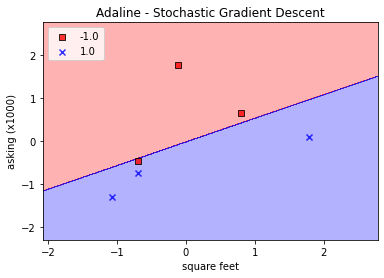

[0.5464336484848865, 0.3868027484110654, 0.32259706540436855, 0.3037048845089028, 0.29674568342446156, 0.2886081986746959, 0.28757042959632445, 0.28361873990525216, 0.2923114965533578, 0.287706581542964, 0.2906824379715346]


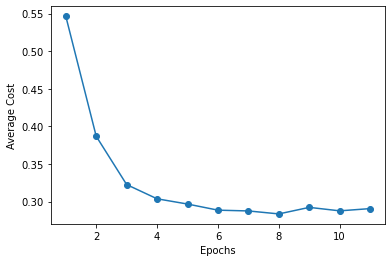

In [10]:
ada_sgd = AdalineSGD(n_iter=11, eta=0.1, random_state=1)
ada_sgd.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada_sgd, resolution=0.01)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('square feet') 
plt.ylabel('asking (x1000)')
plt.legend(loc='upper left')

plt.show()

print(ada_sgd.cost_)

plt.plot(range(1, len(ada_sgd.cost_) + 1), ada_sgd.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.show()

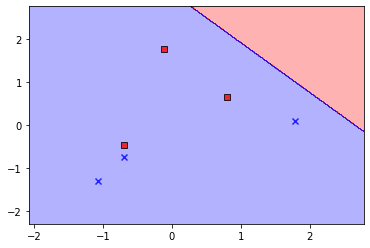

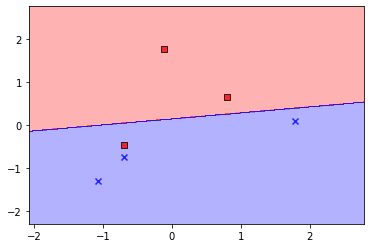

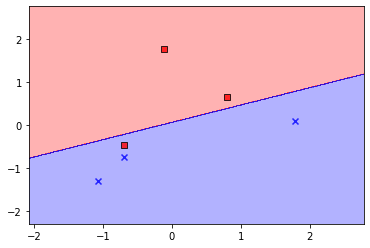

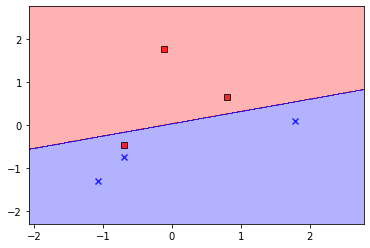

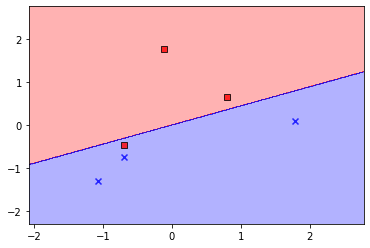

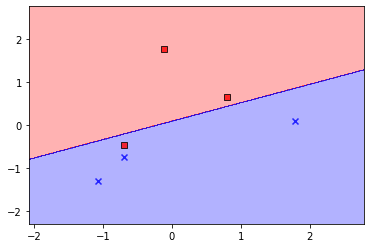

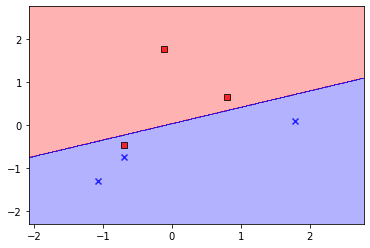

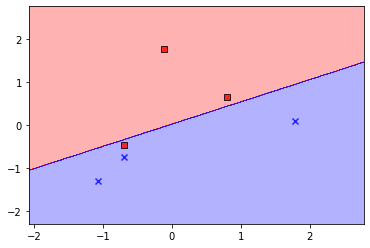

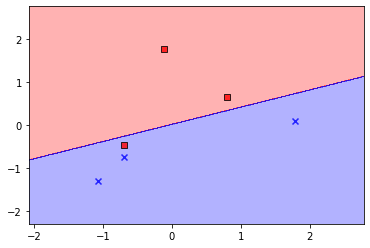

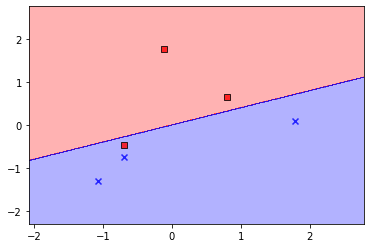

In [11]:
for limit in range(10):
    ada_sgd = AdalineSGD(n_iter=limit, eta=0.1, random_state=1)
    ada_sgd.fit(X_std, y)
    plot_decision_regions(X_std, y, classifier=ada_sgd, resolution=0.01)
    plt.show()